<a href="https://colab.research.google.com/github/eluzuriaga83/data_science_bootcamp/blob/main/Elena_RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bootcamp-DS/Modulo 2/data/TransactionsOnline.csv',sep=';', lineterminator='\r', parse_dates=True)
print(df.shape)
df.head()

(541910, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,\n536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,1/12/2010 8:26,"2,55",17850.0,United Kingdom
1,\n536365,71053,WHITE METAL LANTERN,6.0,1/12/2010 8:26,"3,39",17850.0,United Kingdom
2,\n536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,1/12/2010 8:26,"2,75",17850.0,United Kingdom
3,\n536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,1/12/2010 8:26,"3,39",17850.0,United Kingdom
4,\n536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,1/12/2010 8:26,"3,39",17850.0,United Kingdom


In [ ]:
df.dropna(how='any', inplace=True)

In [ ]:
df.InvoiceDate.unique()

array(['1/12/2010 8:26', '1/12/2010 8:28', '1/12/2010 8:34', ...,
       '9/12/2011 12:31', '9/12/2011 12:49', '9/12/2011 12:50'],
      dtype=object)

In [ ]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  float64
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  object 
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), object(6)
memory usage: 27.9+ MB


In [ ]:
df.UnitPrice.str.replace(',','.')

0         2.55
1         3.39
2         2.75
3         3.39
4         3.39
          ... 
541904    0.85
541905     2.1
541906    4.15
541907    4.15
541908    4.95
Name: UnitPrice, Length: 406829, dtype: object

In [ ]:
df_uk= df.loc[df.Country=='United Kingdom',:]

In [ ]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,\n536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,1/12/2010 8:26,"2,55",17850.0,United Kingdom
1,\n536365,71053,WHITE METAL LANTERN,6.0,1/12/2010 8:26,"3,39",17850.0,United Kingdom
2,\n536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,1/12/2010 8:26,"2,75",17850.0,United Kingdom
3,\n536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,1/12/2010 8:26,"3,39",17850.0,United Kingdom
4,\n536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,1/12/2010 8:26,"3,39",17850.0,United Kingdom


In [ ]:
df_uk.UnitPrice=df_uk.UnitPrice.str.replace(',','.')

<ipython-input-12-a69e1eef72f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uk.UnitPrice=df_uk.UnitPrice.str.replace(',','.')


In [ ]:
df_uk.UnitPrice = df_uk.UnitPrice.astype(float)

<ipython-input-13-e8ca00ac6686>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uk.UnitPrice = df_uk.UnitPrice.astype(float)


In [ ]:
df_uk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361878 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    361878 non-null  object 
 1   StockCode    361878 non-null  object 
 2   Description  361878 non-null  object 
 3   Quantity     361878 non-null  float64
 4   InvoiceDate  361878 non-null  object 
 5   UnitPrice    361878 non-null  float64
 6   CustomerID   361878 non-null  float64
 7   Country      361878 non-null  object 
dtypes: float64(3), object(5)
memory usage: 24.8+ MB


In [ ]:
df_uk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361878 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    361878 non-null  object 
 1   StockCode    361878 non-null  object 
 2   Description  361878 non-null  object 
 3   Quantity     361878 non-null  float64
 4   InvoiceDate  361878 non-null  object 
 5   UnitPrice    361878 non-null  float64
 6   CustomerID   361878 non-null  float64
 7   Country      361878 non-null  object 
dtypes: float64(3), object(5)
memory usage: 24.8+ MB


In [ ]:
df_uk.InvoiceDate=df_uk.InvoiceDate.str.replace('/','-')

<ipython-input-16-5f3622b89d1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uk.InvoiceDate=df_uk.InvoiceDate.str.replace('/','-')


In [ ]:
df_uk.InvoiceNo=df_uk.InvoiceNo.str.replace('\n','')

<ipython-input-17-e58a56726806>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uk.InvoiceNo=df_uk.InvoiceNo.str.replace('\n','')


In [ ]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,1-12-2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,1-12-2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,1-12-2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,1-12-2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,1-12-2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# prompt: convert str to date

import pandas as pd
df_uk['InvoiceDate'] = pd.to_datetime(df_uk['InvoiceDate'], format='%d-%m-%Y %H:%M')


<ipython-input-19-324baebe9bf3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uk['InvoiceDate'] = pd.to_datetime(df_uk['InvoiceDate'], format='%d-%m-%Y %H:%M')


In [ ]:
df_uk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361878 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    361878 non-null  object        
 1   StockCode    361878 non-null  object        
 2   Description  361878 non-null  object        
 3   Quantity     361878 non-null  float64       
 4   InvoiceDate  361878 non-null  datetime64[ns]
 5   UnitPrice    361878 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      361878 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 24.8+ MB


In [ ]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Units sold by month

<ipython-input-120-28071168b925>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='YearMonth'>

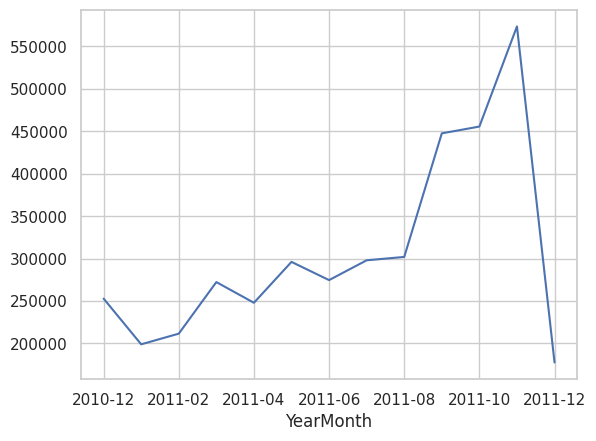

In [ ]:
df_uk['YearMonth'] = pd.to_datetime(df_uk['InvoiceDate']).dt.strftime('%Y-%m')
df_uk.groupby('YearMonth')['Quantity'].sum().plot()


In [ ]:
maxfecha = max(df_uk['InvoiceDate']) #esta fecha se corresponde con la transacción (compra) más reciente realizada por cualquier cliente
maxfecha

Timestamp('2011-12-09 12:49:00')

In [ ]:
df_uk['periodo'] = maxfecha - df_uk['InvoiceDate'] #creamos la nueva variable 'periodo' que mide la diferencia entre la fecha de compra más reciente realizada y la fecha de facturación.
df_uk.head()

<ipython-input-23-072d1f592c09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uk['periodo'] = maxfecha - df_uk['InvoiceDate'] #creamos la nueva variable 'periodo' que mide la diferencia entre la fecha de compra más reciente realizada y la fecha de facturación.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,periodo
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,373 days 04:23:00
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373 days 04:23:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,373 days 04:23:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373 days 04:23:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373 days 04:23:00


In [ ]:
df_uk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361878 entries, 0 to 541893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype          
---  ------       --------------   -----          
 0   InvoiceNo    361878 non-null  object         
 1   StockCode    361878 non-null  object         
 2   Description  361878 non-null  object         
 3   Quantity     361878 non-null  float64        
 4   InvoiceDate  361878 non-null  datetime64[ns] 
 5   UnitPrice    361878 non-null  float64        
 6   CustomerID   361878 non-null  float64        
 7   Country      361878 non-null  object         
 8   periodo      361878 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), float64(3), object(4), timedelta64[ns](1)
memory usage: 27.6+ MB


# Recencia
Ultima fecha en la que se realizó una compra

In [ ]:
Recencia = df_uk.groupby('CustomerID')['periodo'].min()
Recencia= Recencia.reset_index()
Recencia['periodo'] = Recencia['periodo'].dt.days #utilizamos la función dt para convertir la medida del tiempo en días (tal y como se hizo en el NoteBook4)
Recencia.head()

,CustomerID,periodo
0,12346.0,325
1,12747.0,1
2,12748.0,0
3,12749.0,3
4,12820.0,2


# Frecuencia
número de veces que se ha realizado una compra en un periodo de tiempo dado.

In [ ]:
Frecuencia = df_uk.drop_duplicates().groupby('CustomerID')['InvoiceNo'].count()
Frecuencia = Frecuencia.reset_index()
Frecuencia.columns = ['CustomerID', 'Frecuencia']
Frecuencia.head()

,CustomerID,Frecuencia
0,12346.0,2
1,12747.0,103
2,12748.0,4459
3,12749.0,231
4,12820.0,59


# Monetario
nivel de gasto de los clientes en el mismo periodo periodo.

In [ ]:
df_uk['Revenue']=(df_uk.Quantity*df_uk.UnitPrice)
Monetario= df_uk.groupby('CustomerID')['Revenue'].sum()
Monetario = Monetario.reset_index()
Monetario.head(5)

<ipython-input-126-86d74f9b079b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,CustomerID,Revenue
0,12346.0,0.00
1,12747.0,4196.01
2,12748.0,29072.10
3,12749.0,3868.20
4,12820.0,942.34


# Revenue by month

<Axes: xlabel='YearMonth'>

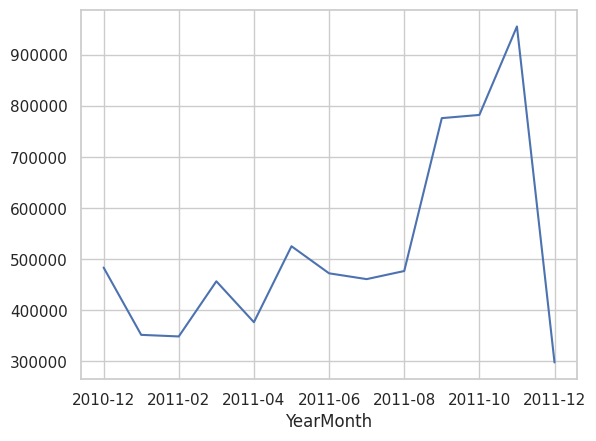

In [ ]:
df_uk.groupby('YearMonth')['Revenue'].sum().plot()


In [ ]:
dfRFM = pd.merge(Recencia,Frecuencia, on='CustomerID', how='left')
dfRFM.head()


,CustomerID,periodo,Frecuencia
0,12346.0,325,2
1,12747.0,1,103
2,12748.0,0,4459
3,12749.0,3,231
4,12820.0,2,59


In [ ]:
dfRFM = pd.merge(dfRFM, Monetario, on='CustomerID', how='left')
dfRFM.head()

,CustomerID,periodo,Frecuencia,Revenue
0,12346.0,325,2,0.00
1,12747.0,1,103,4196.01
2,12748.0,0,4459,29072.10
3,12749.0,3,231,3868.20
4,12820.0,2,59,942.34


In [ ]:
dfRFM.columns = ['CustomerID', 'Recencia', 'Frecuencia', 'Monetario']
dfRFM.head(5)

,CustomerID,Recencia,Frecuencia,Monetario
0,12346.0,325,2,0.00
1,12747.0,1,103,4196.01
2,12748.0,0,4459,29072.10
3,12749.0,3,231,3868.20
4,12820.0,2,59,942.34


In [ ]:
dfRFM.loc[(dfRFM.Recencia>180), :].sort_values(by='Monetario', ascending=False)

,CustomerID,Recencia,Frecuencia,Monetario
2110,15749.0,234,15,21535.90
197,13093.0,266,170,7741.47
3626,17850.0,301,309,5288.63
1566,15032.0,255,55,4464.10
2154,15808.0,305,197,3724.77
...,...,...,...,...
3410,17548.0,217,17,-141.48
3235,17307.0,364,1,-152.64
2480,16252.0,365,21,-295.09
2166,15823.0,336,17,-840.76


In [ ]:
dfRFM.Monetario.max()

256438.49

In [ ]:
dfRFM.loc[dfRFM.Frecuencia<=10, :]

,CustomerID,Recencia,Frecuencia,Monetario
0,12346.0,325,2,0.00
5,12821.0,213,6,92.72
7,12823.0,74,5,1759.50
14,12831.0,261,9,215.05
34,12855.0,372,3,38.10
...,...,...,...,...
3940,18273.0,1,3,204.00
3943,18277.0,57,9,97.63
3944,18278.0,73,9,173.90
3945,18280.0,277,10,180.60


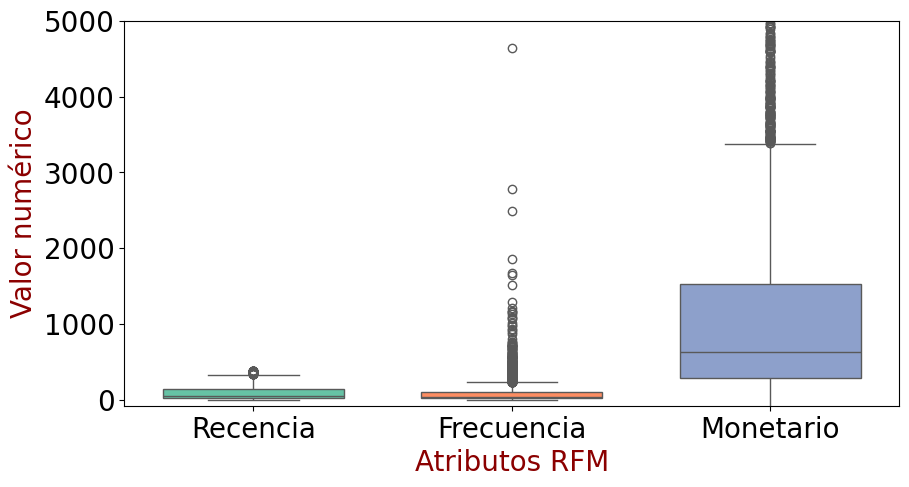

In [ ]:
plt.figure('', figsize = (10,5))
AtributosRFM=['Recencia','Frecuencia','Monetario']
g=sns.boxplot(data= dfRFM[AtributosRFM], orient="v", palette="Set2", whis=1.5, saturation=1, width=0.7)
#-------------------código para el diseño del gráfico--------------------------------------------------
sns.set(style='whitegrid',)
g.set(ylim=(-80, 5000))
font = {'family': 'helvetica',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }
plt.ylabel("Valor numérico",fontdict=font)
plt.xlabel("Atributos RFM", fontdict=font)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
Q1 = np.percentile(dfRFM['Recencia'], 25)
Q3 = np.percentile(dfRFM['Recencia'], 75)
IQR = Q3 - Q1
dfRFM =dfRFM[( dfRFM['Recencia'] >= Q1 - 1.5*IQR) & ( dfRFM['Recencia'] <= Q3 + 1.5*IQR)]

In [ ]:
Q1 = np.percentile(dfRFM['Frecuencia'],25)
Q3 = np.percentile(dfRFM['Frecuencia'],75)
IQR = Q3 - Q1
dfRFM = dfRFM[(dfRFM['Frecuencia'] >= Q1 - 1.5*IQR) & (dfRFM['Frecuencia'] <= Q3 +1.5*IQR)]

In [ ]:
Q1 = np.percentile(dfRFM['Monetario'],25)
Q3 = np.percentile(dfRFM['Monetario'],75)
IQR = Q3 - Q1
dfRFM = dfRFM[(dfRFM['Monetario'] >= Q1 - 1.5*IQR) & (dfRFM['Monetario'] <= Q3 +1.5*IQR)]

In [ ]:
dfRFM.head()

,CustomerID,Recencia,Frecuencia,Monetario
0,12346.0,325,2,0.00
4,12820.0,2,59,942.34
5,12821.0,213,6,92.72
6,12822.0,70,47,918.98
7,12823.0,74,5,1759.50


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# creamos un dataframe donde guardaremos los valores estandarizados de las variables RFM
dfRFM_stan=dfRFM.loc[:,['Recencia','Frecuencia','Monetario']]
lista_columnas=['Recencia','Frecuencia','Monetario'] #creamos una lista de las columnas que vamos a estandarizar
dfRFM_stan[lista_columnas] = scaler.fit_transform(dfRFM[lista_columnas])

In [ ]:
dfRFM_stan

,Recencia,Frecuencia,Monetario
0,2.561211,-1.018096,-1.153802
4,-0.992372,0.204260,0.354839
5,1.329009,-0.932317,-1.005362
6,-0.244249,-0.053078,0.317441
7,-0.200242,-0.953762,1.663073
...,...,...,...
3944,-0.211244,-0.867982,-0.875396
3945,2.033125,-0.846538,-0.864670
3946,0.965950,-0.910872,-1.024413
3947,-0.937363,-0.782203,-0.871074


In [ ]:
dfRFM.head()

,CustomerID,Recencia,Frecuencia,Monetario
0,12346.0,325,2,0.00
4,12820.0,2,59,942.34
5,12821.0,213,6,92.72
6,12822.0,70,47,918.98
7,12823.0,74,5,1759.50


In [ ]:
dfRFM.loc[:,['Recencia','Frecuencia','Monetario']]=dfRFM_stan

In [ ]:
dfRFM.head()

,CustomerID,Recencia,Frecuencia,Monetario
0,12346.0,2.561211,-1.018096,-1.153802
4,12820.0,-0.992372,0.204260,0.354839
5,12821.0,1.329009,-0.932317,-1.005362
6,12822.0,-0.244249,-0.053078,0.317441
7,12823.0,-0.200242,-0.953762,1.663073


In [ ]:
from sklearn.cluster import KMeans
X = dfRFM[['Recencia','Frecuencia','Monetario']]
Error_Recons=[]
k = range(1, 11)

for num in k:
    kmeans = KMeans(n_clusters=num, max_iter=42)
    kmeans.fit(X)
    Error_Recons.append(kmeans.inertia_)

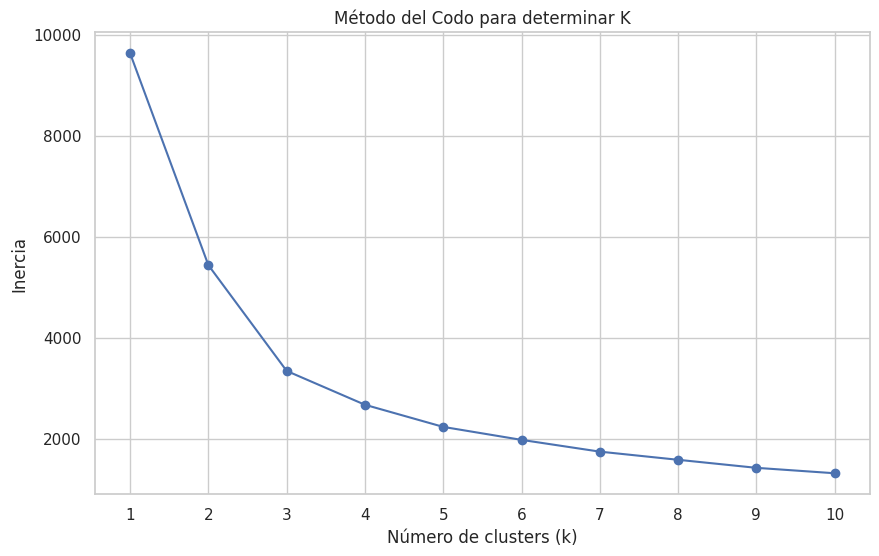

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k, Error_Recons, marker='o')
plt.title('Método del Codo para determinar K')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.xticks(k)
plt.grid(True)
plt.show()

De acuerdo con la grafica anterior, se ve que el numero de clusteres estaria situado aproximadamente k=3

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(dfRFM)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=5, random_state=42)

In [ ]:
dfRFM['Cluster']=kmeans.predict(dfRFM)
dfRFM.head()


,CustomerID,Recencia,Frecuencia,Monetario,Cluster,agglo_cluster
0,12346.0,2.561211,-1.018096,-1.153802,4,2
4,12820.0,-0.992372,0.204260,0.354839,4,2
5,12821.0,1.329009,-0.932317,-1.005362,4,2
6,12822.0,-0.244249,-0.053078,0.317441,4,2
7,12823.0,-0.200242,-0.953762,1.663073,4,2


In [ ]:
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=5)
agglo.fit(dfRFM)

AgglomerativeClustering(n_clusters=5)

In [ ]:
dfRFM['agglo_cluster']=agglo.labels_
dfRFM.head()

,CustomerID,Recencia,Frecuencia,Monetario,Cluster,agglo_cluster
0,12346.0,2.561211,-1.018096,-1.153802,4,2
4,12820.0,-0.992372,0.204260,0.354839,4,2
5,12821.0,1.329009,-0.932317,-1.005362,4,2
6,12822.0,-0.244249,-0.053078,0.317441,4,2
7,12823.0,-0.200242,-0.953762,1.663073,4,2


In [ ]:
dfRFM_melt = dfRFM.melt(id_vars=['CustomerID','Cluster','agglo_cluster'])
dfRFM_melt.head()

,CustomerID,Cluster,agglo_cluster,variable,value
0,12346.0,4,2,Recencia,2.561211
1,12820.0,4,2,Recencia,-0.992372
2,12821.0,4,2,Recencia,1.329009
3,12822.0,4,2,Recencia,-0.244249
4,12823.0,4,2,Recencia,-0.200242


<Axes: xlabel='variable', ylabel='Value'>

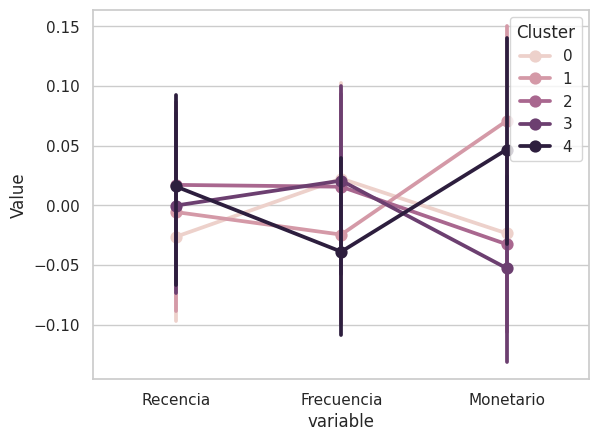

In [ ]:
plt.ylabel('Value')
sns.pointplot(data=dfRFM_melt, x='variable', y='value', hue='Cluster')


<Axes: xlabel='variable', ylabel='Value'>

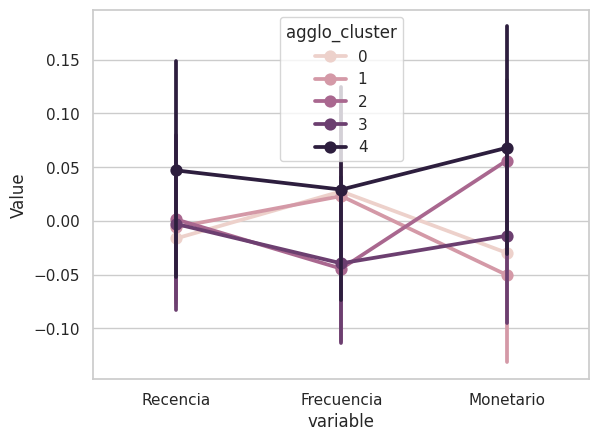

In [ ]:
plt.ylabel('Value')
sns.pointplot(data=dfRFM_melt, x='variable', y='value', hue='agglo_cluster')

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(dfRFM["Cluster"],dfRFM["agglo_cluster"])

array([[668,   0,   0,   0,   0],
       [  0,   0,  79, 116, 411],
       [239,   0,   0, 420,   0],
       [ 13, 646,   0,   0,   0],
       [  0,   0, 620,   0,   0]])

In [ ]:
# Clusters labels
from sklearn.metrics import silhouette_score

labels = kmeans.labels_
# Calculate the silhouette score
silhouette = silhouette_score(dfRFM,labels)
silhouette

0.5624887427826836

In [ ]:
import plotly.express as px
fig = px.scatter(dfRFM, x="Recencia", y="Monetario", color="Cluster")
fig.show()

In [ ]:
fig = px.scatter(dfRFM, x="Recencia", y="Frecuencia", color="agglo_cluster")
fig.show()

In [ ]:
fig = px.scatter(dfRFM, x="Frecuencia", y="Monetario", color="agglo_cluster")
fig.show()

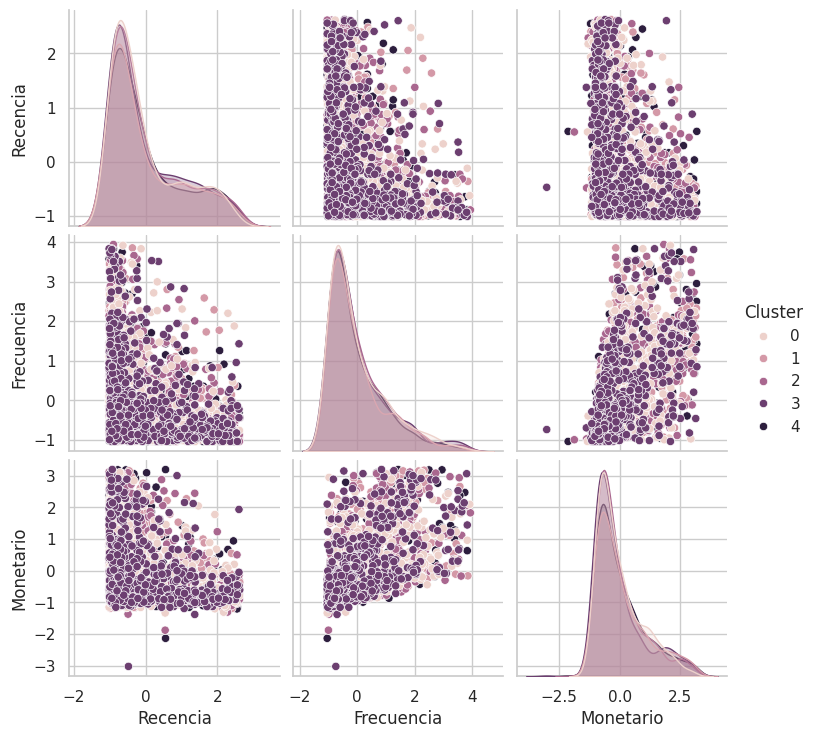

In [ ]:
sns.pairplot(dfRFM[['Recencia','Frecuencia', 'Monetario','Cluster']], hue='Cluster')

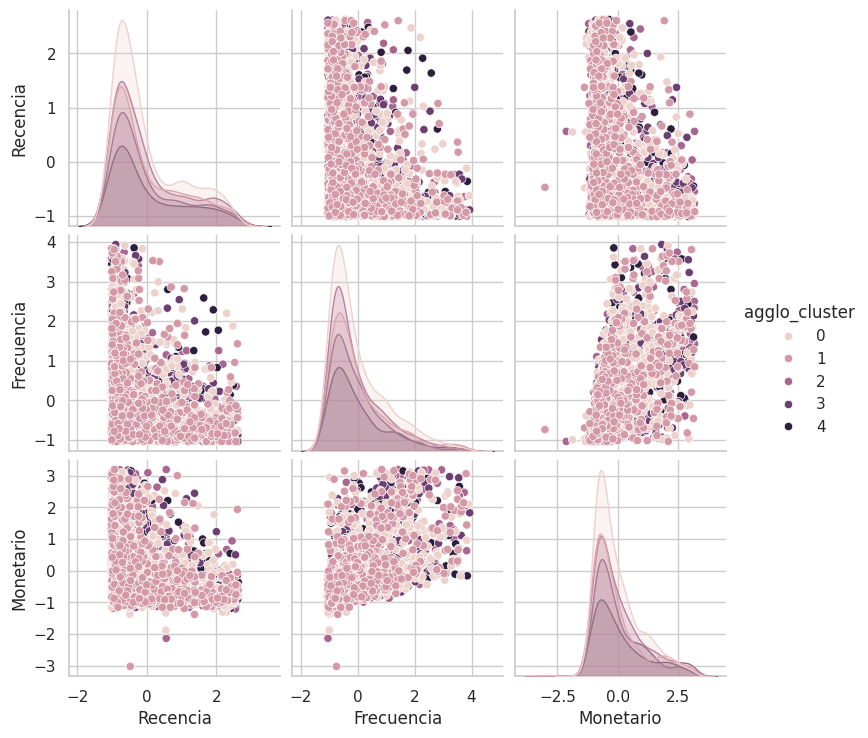

In [ ]:
sns.pairplot(dfRFM[['Recencia','Frecuencia', 'Monetario','agglo_cluster']], hue='agglo_cluster')

**Best Customers**: These are customers with the highest scores in all RFM categories. They buy recently, frequently, and spend more than other customers.Cluster 4

• **Loyal Customers**: They have high scores in the frequency dimension. They visit and buy regularly but might not spend as much as the best customers. Cluster 1

• **Big Spenders**: They have high scores in the monetary dimension. They may not purchase as frequently as loyal or best customers, but when they do, they spend large amounts. Cluster 2

• **Almost Lost**: These are customers who have not made a purchase in a long time, but in the past, they did so frequently and spent a lot. Cluster 0

• **Lost Customers**: It has been a long time since their last purchase and their purchases were infrequent and of low value. Cluster 3

It has been difficult for me to identify the clusters because there isn’t a clear segmentation. However, Agglo_cluster has been a bit clearer than K-means.